## Workflow - Touch Maps & Heat Maps (Player)

---
> ### 1. SET UP DEVELOPMENT ENVIRONMENT

**1.0 Import required Python software into current development environment (i.e. this notebook)**
```
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
```

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image

**1.1 Configure notebook for code autocompletion + displaying plots + displaying max columns and rows of panda data objects**
```
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None
```

In [52]:
%config Completer.use_jedi = False
%matplotlib inline
pd.options.display.max_columns = None
pd.options.display.max_rows = None

---
> ### 2. LOAD & PREP DATA

**2.0 Data Load** - read in the `match_events.csv` file located in the `data` directory (folder)
```
raw_data = pd.read_csv("data/match_events.csv")
```

In [53]:
raw_data = pd.read_csv("data/match_events.csv")

**2.1 Data Prep** - make a copy of raw data to work on called `df`

```
df = raw_data.copy()
```

In [54]:
df = raw_data.copy()

**2.2 Data Prep** - use the `head()` function to check the first 5 rows of the `df` object, which is a `pandas` dataframe (df), basically a 2 dimensional data structure with rows & columns 
```
df.head()
```

In [55]:
df.head()

,start_min,start_sec,end_min,end_sec,match_half,player1,player1_team,player2,player2_team,event,press,press_team,start_x,start_y,end_x,end_y,press_x,press_y
0,0,0,0.0,0.0,1,fernandes,man_u,NaN,NaN,set_piece,NaN,NaN,52.5,34.0,NaN,NaN,NaN,NaN
1,0,0,0.0,1.0,1,fernandes,man_u,ronaldo,man_u,completed_pass,NaN,NaN,52.5,34.0,55.8,31.3,NaN,NaN
2,0,1,0.0,2.0,1,ronaldo,man_u,matic,man_u,completed_pass,odegaard,arsenal,55.8,31.3,65.6,33.4,55.7,30.4
3,0,2,0.0,3.0,1,matic,man_u,dalot,man_u,completed_pass,nketiah,arsenal,65.6,33.4,72.2,55.2,63.4,36.4
4,0,3,0.0,5.0,1,dalot,man_u,NaN,NaN,incomplete_pass,NaN,NaN,72.2,55.2,NaN,NaN,NaN,NaN


**2.3 Data Prep** - check the dimensions of the `df` (<no. of rows>, <no. of columns>). Should be (1854, 18).
```
df.shape
```

In [56]:
df.shape

(1854, 18)

**2.4 Data Load** - load the `emirates_pitch.png` graphic located in the `data` directory (folder) and store in a variable called `pitch`
```
pitch = Image.open("data/emirates_pitch.png")
```

In [57]:
pitch = Image.open("data/emirates_pitch.png")

**2.5 Data Prep** - check the `pitch` object using `imshow()` function available from the `matplotlib` plotting library
```
plt.imshow(pitch)
```

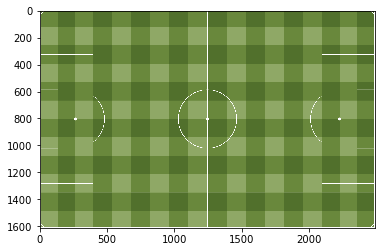

In [58]:
plt.imshow(pitch)

---
> ### 3. EXPLORATORY DATA ANALYSIS (EDA)

**3.0 EDA** - create a new variable called `player` and assign a chosen player from the match to it as a string (`""`) e.g. `"elneny"`
```
player = "elneny"
```

In [59]:
player = "elneny"

**3.1 EDA** - filter `df` using the `loc` method, specifying rows to be filtered based on both `player2` matching the `player` variable above and the `event` being a `"completed_pass"`, whilst also filtering for the 2x columns `end_x` and `end_y`. Assign a copy of this object to a new variable called `firsttouch_df`  
```
firsttouch_df = df.loc[ (df["player2"] == player) & (df["event"] == "completed_pass")  ,  ["end_x", "end_y"] ].copy()
```

In [60]:
firsttouch_df = df.loc[ (df["player2"] == player) & (df["event"] == "completed_pass")  ,  ["end_x", "end_y"] ].copy()

**3.2 EDA** - check `firsttouch_df`
```
firsttouch_df.head()
```

In [61]:
firsttouch_df.head()

,end_x,end_y
50,50.9,30.4
176,29.3,31.4
195,66.8,16.0
231,33.5,20.5
240,71.9,52.6


**3.3 EDA** - also check `firsttouch_df` does not have any values which are NA, i.e. missing, as this missing data will mess with the plots we will be making
```
firsttouch_df.isna().values.any()
```

In [62]:
firsttouch_df.isna().values.any()

False

**3.4 EDA** - use the `matplotlib` plotting library to create the a Touch Map for the chosen player, by setting-up and plotting a scatter graph, i.e. markers representing the chosen player's touches on the pitch graphic, feeding in the x and y co-ordinates of `firsttouch_df` to the `plt.scatter()` function
```
fig, ax = plt.subplots(figsize=(20, 10))
plt.axis( [ 0, 105, 0, 68])
ax.imshow(pitch, extent=[0,105,0,68])

plt.scatter(x = firsttouch_df["end_x"], y = firsttouch_df["end_y"], s=1000)
```
Extra options:    
-plt.tight_layout()   
-c="cornflowerblue", edgecolors="gold", linewidth=5, alpha=0.8  
-plt.savefig("TouchMap.png")

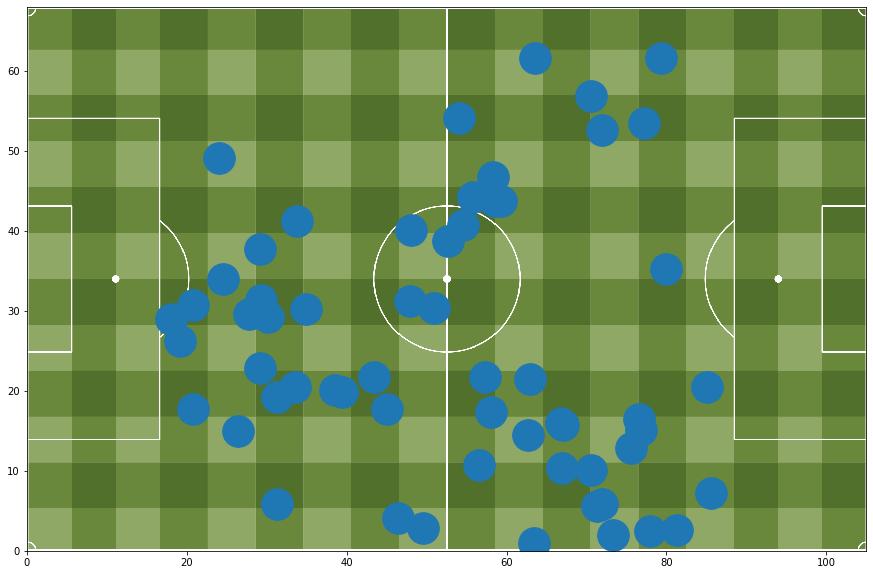

In [63]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.axis( [ 0, 105, 0, 68])
ax.imshow(pitch, extent=[0,105,0,68])

plt.scatter(x = firsttouch_df["end_x"], y = firsttouch_df["end_y"], s=1000)

**3.5 EDA PREP** - run some extra steps to import `seaborn` visualisation library into current development environment (i.e. this notebook) - NOTE the `piplite` calls are not standard practice but are necessary workarounds due to certain cutting-edge tech being used for this workshop
```
import piplite
await piplite.install("seaborn")
import seaborn as sns
```

In [65]:
#import piplite
#await piplite.install("seaborn")
import seaborn as sns

**3.6 EDA** - use the `seaborn` visualisation library to create a Heat Map of the chosen player's touches on the pitch graphic by passing the the x and y co-ordinates of `firsttouch_df` to the `sns.kdeplot()` function
```
fig, ax = plt.subplots(figsize=(20, 10))
plt.axis( [0, 105, 0, 68] )
ax.imshow(pitch, extent=[0,105,0,68])

sns.kdeplot(x = firsttouch_df["end_x"], y = firsttouch_df["end_y"], n_levels=20, cmap="rocket_r", fill=True, alpha=0.8)

```
Extra options:    
-plt.tight_layout()   
-cmap options: "rocket", "mako", "flare", and "crest". Append "_r" to the string to reverse the order of the colours    
-plt.savefig("HeatMap.png")

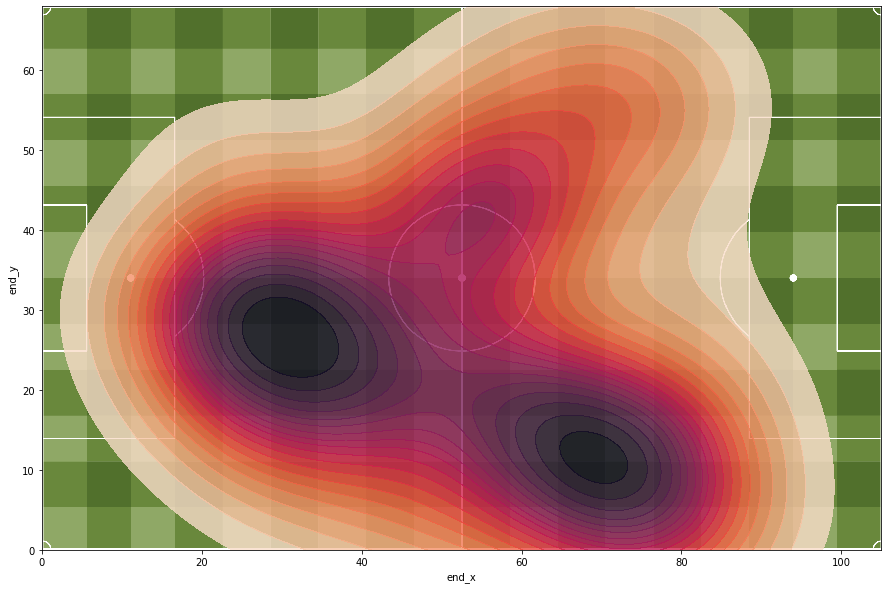

In [66]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.axis( [0, 105, 0, 68] )
ax.imshow(pitch, extent=[0,105,0,68])

sns.kdeplot(x = firsttouch_df["end_x"], y = firsttouch_df["end_y"], n_levels=20, cmap="rocket_r", fill=True, alpha=0.8)

---

_Sports Python Educational Project content, licensed under Attribution-NonCommercial-ShareAlike 4.0 International_